# Spot Check Machine Learning Algorithms - Classification

LR | Acc: 78.0% (5.0)%
LDA | Acc: 77.0% (5.0)%
KNN | Acc: 71.0% (5.0)%
CART | Acc: 70.0% (5.0)%
NB | Acc: 76.0% (4.0)%
SVM | Acc: 76.0% (3.0)%


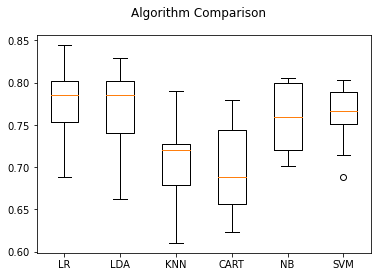

In [12]:
# Compare Algorithms
# Import libraries
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
# Machine Learning Module
from sklearn.model_selection import KFold, cross_val_score
# Machine Learning Algorithm (classifier, model)
'''
Linear-Algorithms
'''
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
'''
Non-Linear Algorithms
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# ML metrics
from sklearn.metrics import confusion_matrix, classification_report
filename = './datasets/pima-indians-diabetes.data.csv'
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=col_names)
# Get values from dataframe
array = data.values
# Get inputs (all variables except the class)
X = array[ : , 0:-1]
# Get the output (class)
Y = array[ : , -1]
# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluate each model in turn
results = []
names = []
score = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = f'{name} | Acc: {cv_results.mean().round(2)*100.0}% ({cv_results.std().round(2)*100.0})%'
    print(msg)
# Boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()